In [115]:
import pandas as pd
import matplotlib.pyplot as plt #Libraries for visualization
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np #Library for numerical calculations
from scipy import stats #Library for statistical analysis 
from sklearn.naive_bayes import GaussianNB 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
%matplotlib notebook 

In [116]:
df = pd.read_csv('character-predictions.csv')
df

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1942,0,1,0.803,0.197,Luwin,NaN,1,Westeros,NaN,...,NaN,NaN,0,0,NaN,0,0,1,0.351171,0
1942,1943,0,1,0.987,0.013,Reek,NaN,1,NaN,NaN,...,NaN,NaN,0,0,NaN,0,0,0,0.096990,0
1943,1944,1,1,0.520,0.480,Symeon Star-Eyes,NaN,1,NaN,NaN,...,NaN,NaN,0,0,NaN,0,0,0,0.030100,1
1944,1945,1,1,0.637,0.363,Coldhands,NaN,1,NaN,NaN,...,NaN,NaN,0,0,NaN,0,0,0,0.130435,1


In [117]:
df2 = df.drop(columns = ['S.No', 'actual', 'pred', 'alive', 'plod', 'name', 'mother', 'father', 
                         'heir', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5', 'culture', 'DateoFdeath', 'dateOfBirth',
                         'isAliveMother', 'isAliveFather', 'isAliveSpouse', 'isAliveHeir', 'age'])
titles, houses = [], []
for (title, house) in zip(df2['title'], df2['house']):
    if title != title:
        titles.append(0)
    else:
        titles.append(1)
    if house != house:
        houses.append(0)
    else:
        houses.append(1)
                          
df2['title'] = titles
df2['house'] = houses
df2
#gi otsranuvam kolonite koi se iminja, veke napraveni predikcii i prisustvo vo knigite, 
#dopolnitelnoi i onie koloni kade ima mnogu null vrednosti
#potoa gi menuvam kolonite title i house da kazuvaat samo dali likovite imaat takov atribut ili ne 

,title,male,house,isMarried,isNoble,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,0,1,0,0,0,11,1,1,0.605351,0
1,1,1,1,1,1,1,1,1,0.896321,1
2,1,1,1,0,1,0,0,0,0.267559,1
3,1,0,1,1,1,0,0,0,0.183946,0
4,1,0,1,1,1,0,0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...
1941,0,1,1,0,0,0,0,1,0.351171,0
1942,0,1,1,0,0,0,0,0,0.096990,0
1943,0,1,0,0,0,0,0,0,0.030100,1
1944,0,1,1,0,0,0,0,0,0.130435,1


In [118]:
X = df2[['title', 'male', 'house', 'isMarried', 'isNoble', 'numDeadRelations', 'boolDeadRelations', 'isPopular', 'popularity']]
Y = df2['isAlive']
feature_names = X.columns
number_of_features = X.shape[1]
number_of_classes = 2 #ili mrtov ili ne
print(number_of_features, number_of_classes)

9 2


<IPython.core.display.Javascript object>


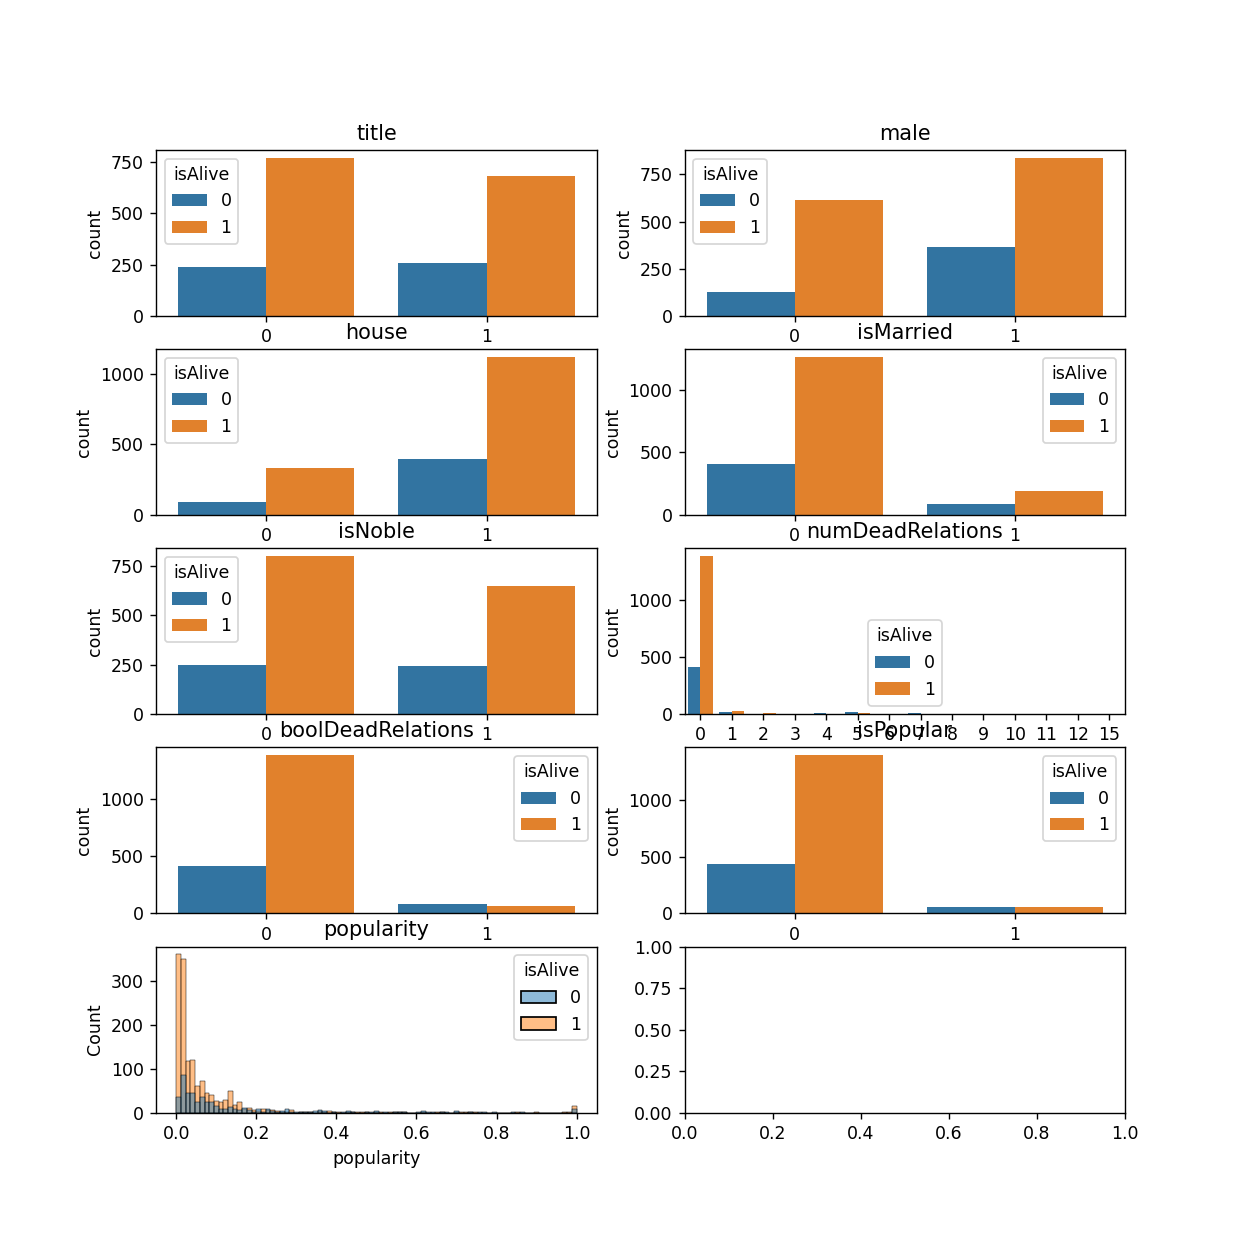

In [119]:
fig = plt.figure(figsize=(10, 10))
fig.subplots(nrows=5, ncols=2)
count = 0
for name in feature_names:
    count += 1
    if name == 'popularity':
        ax = plt.subplot(5,2, count)
        ax = sns.histplot(
            x=name, 
            data=df2, 
            hue='isAlive') 
        plt.title(name)
        plt.show()
    else:
        ax = plt.subplot(5,2, count)
        ax = sns.countplot(
            x=name, 
            data=df2, 
            hue='isAlive') 
        plt.title(name)
plt.show()

<IPython.core.display.Javascript object>


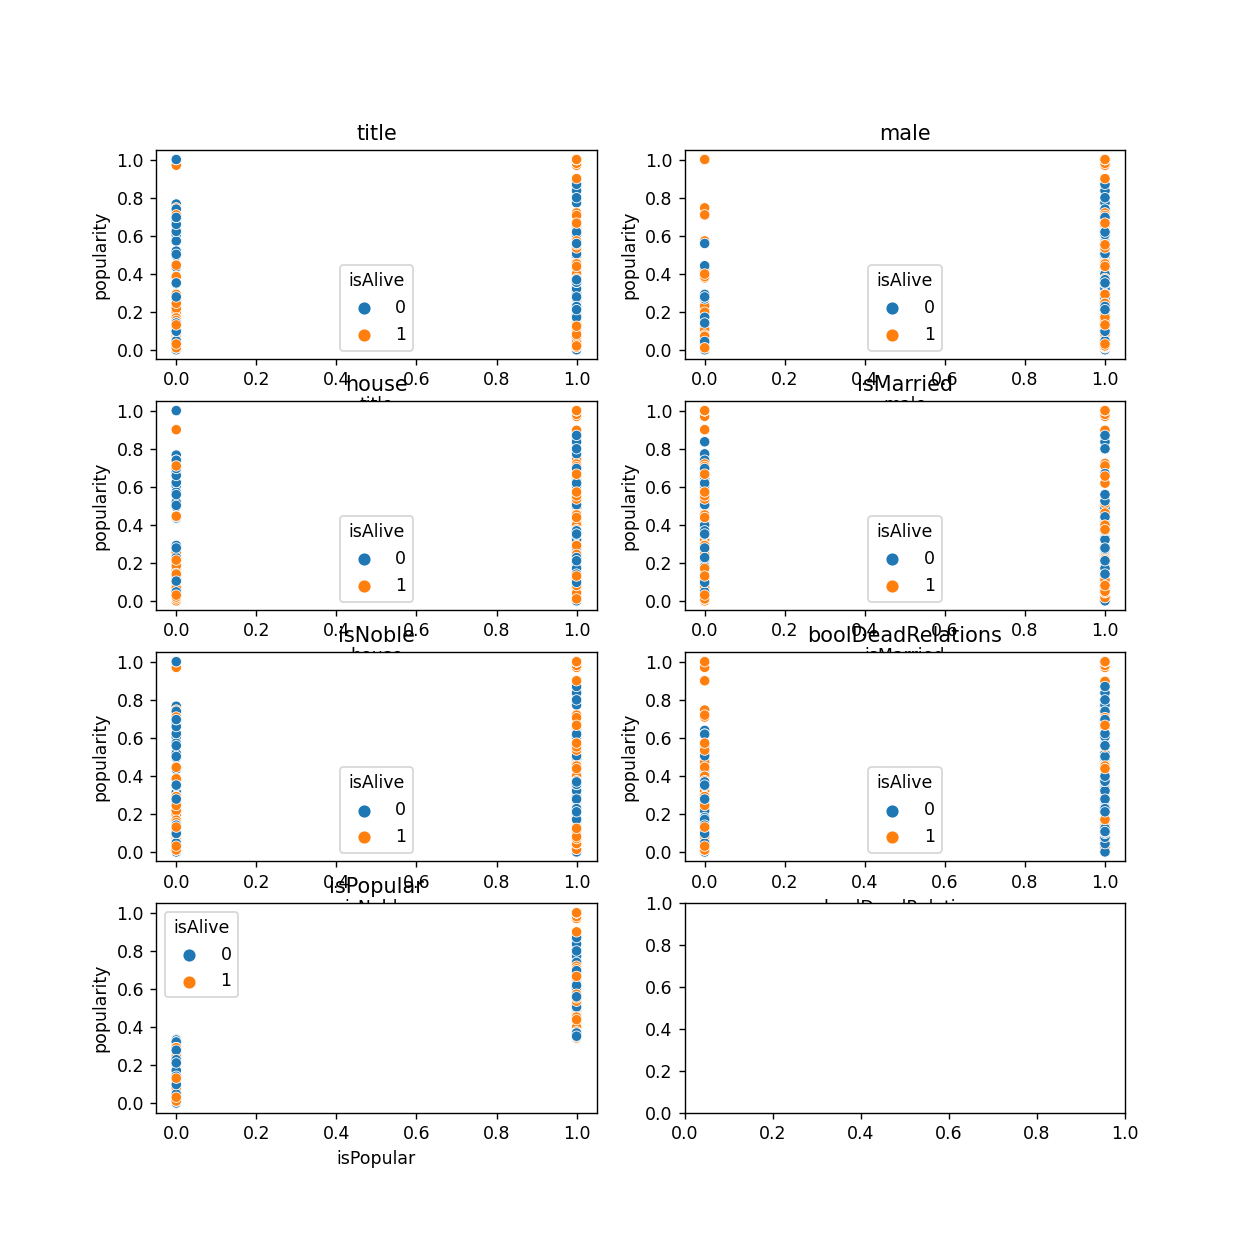

In [120]:
fig = plt.figure(figsize=(10, 10))
fig.subplots(nrows=4, ncols=2)
count = 0
for name in ['title', 'male', 'house', 'isMarried', 'isNoble', 'boolDeadRelations', 'isPopular']:
    count += 1
    ax = plt.subplot(4,2, count)
    ax = sns.scatterplot(
    x=name, 
    y='popularity',
    data=df2, 
    hue='isAlive') 
    plt.title(name)
plt.show()

In [121]:
#site podatoci osven popularity se nominalni pa ne mozam da proveram korelacija izmegu niv
X = X.drop(columns = 'isPopular')
#odlucuvam da ja trgnam ovaa kolona bidejki ocigledno ne e nezavisna od popularity, a NB klasifikatorot pretpostavuva nezavisnot izmegu promenlivite
X.columns

Index(['title', 'male', 'house', 'isMarried', 'isNoble', 'numDeadRelations',
       'boolDeadRelations', 'popularity'],
      dtype='object')

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [127]:
#Naive Bayes
gnb = GaussianNB() 
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy = np.round(np.sum(y_test == y_pred)/len(y_test),3)
print("Naive Bayes accuracy for the Game of Thrones death prediction:", accuracy)

Naive Bayes accuracy for the Game of Thrones death prediction: 0.772


In [128]:
#LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train) 
y_pred = lda.predict(X_test) 
accuracy = np.round(np.sum(y_test == y_pred)/len(y_test),3)
print("LDA accuracy for the Game of Thrones death prediction:", accuracy) 

LDA accuracy for the Game of Thrones death prediction: 0.774


In [129]:
#QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train) 
y_pred = qda.predict(X_test) 
accuracy = np.round(np.sum(y_test == y_pred)/len(y_test),3)
print("LDA accuracy for the Game of Thrones death prediction:", accuracy) 

LDA accuracy for the Game of Thrones death prediction: 0.779
